In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import NullLocator, LinearLocator, MultipleLocator, IndexLocator, FixedLocator, LogLocator, MaxNLocator
from matplotlib.ticker import NullFormatter, FormatStrFormatter, FuncFormatter, ScalarFormatter, FixedFormatter

# 1997 - 2006, 2009 - 2023 погода Рязань

# все годы
      t  - температура
      p  - давление
      ws - скорость ветра
    wdir - направление ветра

In [2]:
weather = pd.read_csv('weather.csv', index_col = ['year','month','day'])
weather.shape

(8759, 6)

# Общее

#### распределение силы по направлениям ветра

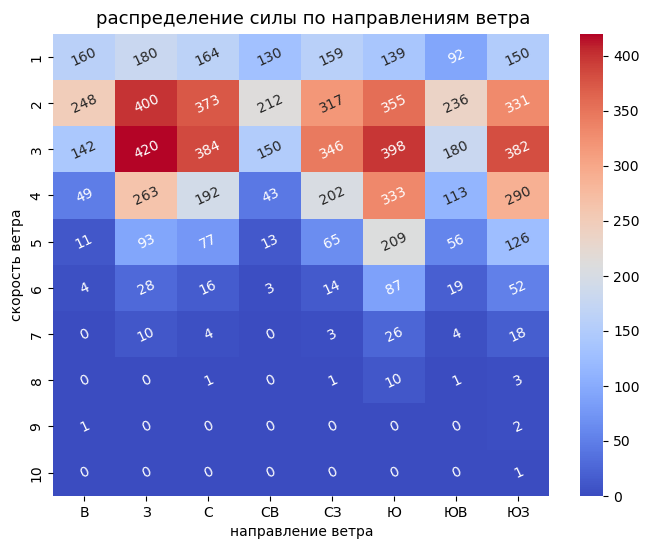

In [3]:
wsd = weather[weather['wspeed']>0].pivot_table(index='wspeed', columns='wdir', values='t(day)', aggfunc=['count'])\
.fillna(0).astype('int64')
wsd.columns = wsd.columns.droplevel()
fig13 = plt.figure(figsize=(8, 6))
fig13.suptitle('распределение силы по направлениям ветра',x=0.45,y=0.92, fontsize=13)
ax_wsd = fig13.add_subplot()
ax_wsd = sns.heatmap(wsd, cmap='coolwarm', annot=wsd, annot_kws={'size': 10, 'rotation': 25}, fmt='.0f')
ax_wsd.set(xlabel="направление ветра", ylabel="скорость ветра");